# Baseline Model

We are building a regression model to predict UCSB-area rental prices using listing characteristics. Outlined below is a basic regression model.

First, we import the necessary modules and libraries:

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Next, we load the cleaned dataset.

In [32]:
df = pd.read_csv(
    "../data/cleaned/ucsb_cleaned_listings_combo.csv",
    encoding = "latin1"
)

df.head()

,address,bathrooms,bedrooms,price_from,distance_to_ucsb_miles
0,"100 Baldwin Dr, Unit 107, Goleta, CA",1.0,0,3255,1.8
1,"100 Baldwin Dr, Unit 115, Goleta, CA",1.0,0,3240,1.8
2,"100 Baldwin Dr, Unit 205, Goleta, CA",1.0,1,3310,1.8
3,"100 Baldwin Dr, Unit 207, Goleta, CA",1.0,1,3310,1.8
4,"100 Baldwin Dr, Unit 203, Goleta, CA",1.0,1,3770,1.8


Then we examine the columns to see what to train/test/split:

In [5]:
df.columns

Index(['address', 'bathrooms', 'bedrooms', 'price_from',
       'distance_to_ucsb_miles'],
      dtype='object')

Since this is a rent prediction model, we will target the "price_from" variable.

In [7]:
X = df.drop(["price_from", "address"], axis=1)
y = df["price_from"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (197, 3)
y shape: (197,)


The results from above indicate for our target X shape, we have 197 listings and 3 features. Our y-value, which is just the "price_from" variable itself, only contains 197 listings. 

In [9]:
X.info() # making sure all columns are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bathrooms               197 non-null    float64
 1   bedrooms                197 non-null    int64  
 2   distance_to_ucsb_miles  197 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.7 KB


Here, we begin splitting our data for our regression model:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print(X_train.shape, X_test.shape)

(157, 3) (40, 3)


The results from the train/test/split produce 157 training samples, 40 test samples, and 3 features.

In [41]:
# initialize model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

Then, we evaluate the standard metrics: mean squared error, root mean squared error, and r^2 score. 

In [46]:
mean_abs_err = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE: ", mean_abs_err)
print("RMSE: ", rmse)
print("R^2: ", r2)

MAE:  1489.8838403391092
RMSE:  1975.9860354741204
R^2:  0.5597134630842198


Results:

**Mean absolute error**: On average, our predictions are off by about $1490. But, we need context for the rent range. Such a large value might not be acceptable depending on spread. 

**RMSE**: Since RMSE > MAE, we can infer that some listings have larger prediction errors and there may be outliers. 

**R^2**: Our model explains about 56% of the variation in rent prices, for a very simple model using only bathrooms, bedrooms, distance to UCSB. 

The results are solid for a baseline model, but they are not sufficient alone.

Before improving the model, we look at the coefficients:

In [19]:
coef_df = pd.DataFrame({
    "Feature" : X.columns, 
    "Coefficient": model.coef_
})

print(coef_df)
print("Intercept: ", model.intercept_)

                  Feature  Coefficient
0               bathrooms -1713.021732
1                bedrooms  2140.895439
2  distance_to_ucsb_miles  -376.080493
Intercept:  3031.7519186802165


This tells us how bedrooms affect rent, how distance affects rent, and whether signs make sense. 

Next we plot rediduals:

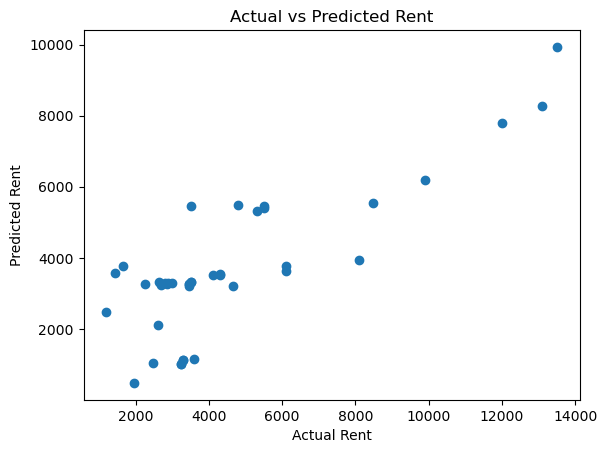

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.show()

This helps us see: are errors random? Is our model biased? Are high rents unpredicted?

Next steps we are considering:

1. add more features
2. encode categorical variables
3. try regularized models (Ridge/Lasso)
4. check for nonlinearity
5. feature engineering (price per bedroom)
6. cross-validation